In [1]:
import pandas as pd
import time
import vaex as vx

# Reading the data

In [2]:
starttime = time.time()
data = pd.read_csv('taxi data.csv')
endtime = time.time()
endtime-starttime

9.752885103225708

In [3]:
%%time
data2 = vx.open("taxi data.csv")

Wall time: 9.35 s


In [ ]:
data2

# creating HDF5 file

In [4]:
vaex_df = vx.from_csv('taxi data.csv', convert=True, chunk_size=5_00_000)

In [5]:
type(vaex_df)

vaex.hdf5.dataset.Hdf5MemoryMapped

In [8]:
%%time
df = vx.open('taxi data.csv.hdf5')

Wall time: 10.5 ms


In [7]:
df

#,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215484619139,40.76793670654297,-73.96463012695312,40.765602111816406,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98041534423827,40.738563537597656,-73.99948120117188,40.73115158081055,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97902679443358,40.763938903808594,-74.00533294677734,40.71008682250977,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004028320312,40.719970703125,-74.01226806640625,40.70671844482422,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305297851562,40.79320907592773,-73.9729232788086,40.78252029418945,N,435
...,...,...,...,...,...,...,...,...,...,...,...
"1,458,639",id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.9822006225586,40.745521545410156,-73.99491119384766,40.74016952514648,N,778
"1,458,640",id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00094604492188,40.74737930297852,-73.97018432617188,40.796546936035156,N,655
"1,458,641",id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.9591293334961,40.768798828125,-74.00443267822266,40.70737075805664,N,764
"1,458,642",id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.9820785522461,40.749061584472656,-73.97463226318358,40.75710678100585,N,373


In [9]:
df.passenger_count

Expression = passenger_count
Length: 1,458,644 dtype: int64 (column)
---------------------------------------
      0  1
      1  1
      2  1
      3  1
      4  1
   ...    
1458639  4
1458640  1
1458641  1
1458642  1
1458643  1

# Virtual Columns

### Sometimes it is convenient to store an expression as a column. We call this a virtual column since it does not take up any memory, and is computed on the fly when needed. A virtual column is treated just as a normal column.

In [10]:
import numpy as np

In [11]:
df['tripduration_squared'] = np.square(df.trip_duration)

In [12]:
df.head()

#,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,tripduration_squared
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.9822,40.7679,-73.9646,40.7656,N,455,207025
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.9804,40.7386,-73.9995,40.7312,N,663,439569
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.7639,-74.0053,40.7101,N,2124,4.51138e+06
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.0123,40.7067,N,429,184041
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.9731,40.7932,-73.9729,40.7825,N,435,189225
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.9829,40.7422,-73.9921,40.7492,N,443,196249
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969,40.7578,-73.9574,40.7659,N,341,116281
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.9693,40.7978,-73.9225,40.7606,N,1551,2.4056e+06
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.9995,40.7384,-73.9858,40.7328,N,255,65025
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981,40.7443,-73.973,40.79,N,1225,1.50062e+06


In [ ]:
### Statistical functions

In [13]:
df.mean(df.trip_duration)

array(959.49227296)

### lets print the variance

In [14]:
df.passenger_count.var()

array(1.72723129)

In [15]:
df.correlation

<bound method DataFrame.correlation of #          id         vendor_id    pickup_datetime      dropoff_datetime     passenger_count    pickup_longitude    pickup_latitude     dropoff_longitude    dropoff_latitude    store_and_fwd_flag    trip_duration    tripduration_squared
0          id2875421  2            2016-03-14 17:24:55  2016-03-14 17:32:30  1                  -73.98215484619139  40.76793670654297   -73.96463012695312   40.765602111816406  N                     455              207025
1          id2377394  1            2016-06-12 00:43:35  2016-06-12 00:54:38  1                  -73.98041534423827  40.738563537597656  -73.99948120117188   40.73115158081055   N                     663              439569
2          id3858529  2            2016-01-19 11:35:24  2016-01-19 12:10:48  1                  -73.97902679443358  40.763938903808594  -74.00533294677734   40.71008682250977   N                     2124             4511376
3          id3504673  2            2016-04-06 19:32:31

## Lets plot the trip duration

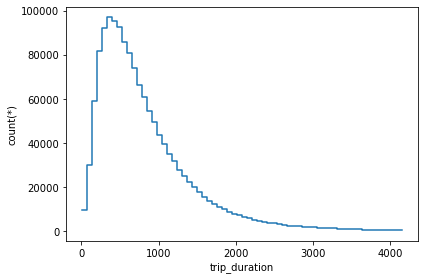

In [16]:
df.plot1d(df.trip_duration, limits='99%')

In [ ]:
## saving a filtered dataset

In [17]:
filterdata= df['passenger_count'] <5

In [18]:
df_filtered = df[filterdata]

In [19]:
df_filtered.export_hdf5('passengercountlessthan5.hdf5')

### count of records in the dataframe

In [20]:
df_filtered.__len__()

1332218

In [21]:
df.__len__()

1458644